# Fashion MNIST dataset, an alternative to MNIST

# https://keras.io/api/datasets/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras import Sequential

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [5]:
label_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
label_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

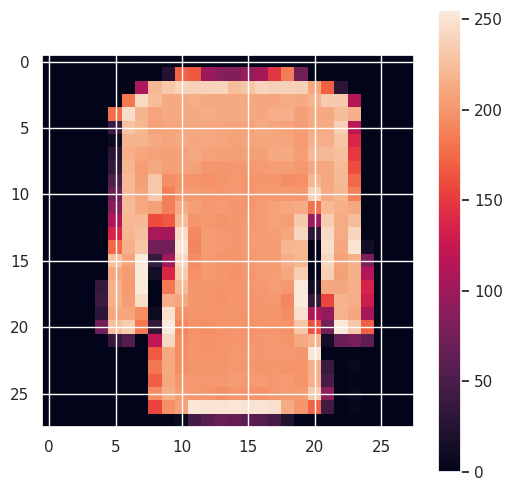

In [6]:
plt.figure(figsize=(6,6))
plt.imshow(train_images[55000])
plt.colorbar()
plt.grid(True)
plt.show()

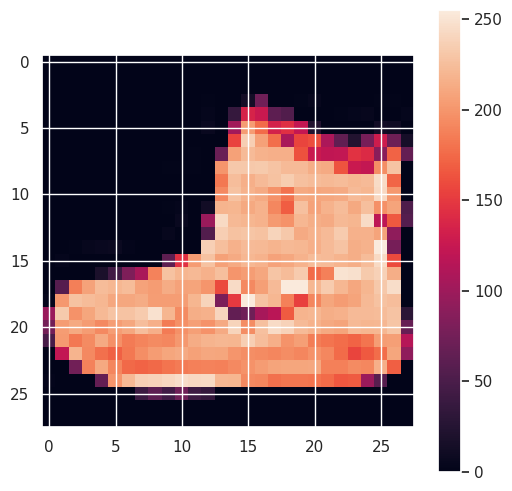

In [7]:
plt.figure(figsize=(6,6))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [8]:
train_images = train_images / 255.0
test_images = test_images/255.0

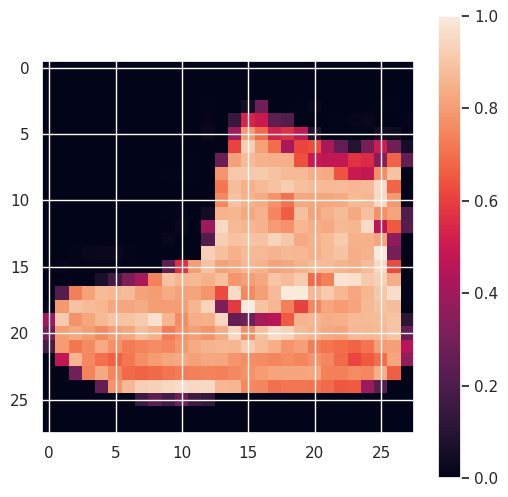

In [9]:
plt.figure(figsize=(6,6))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

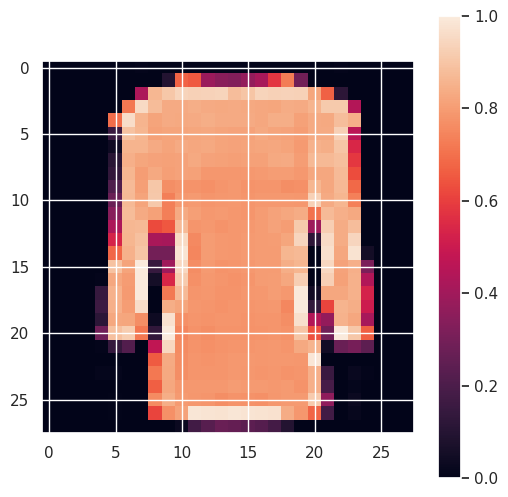

In [10]:
plt.figure(figsize=(6,6))
plt.imshow(train_images[55000])
plt.colorbar()
plt.grid(True)
plt.show()

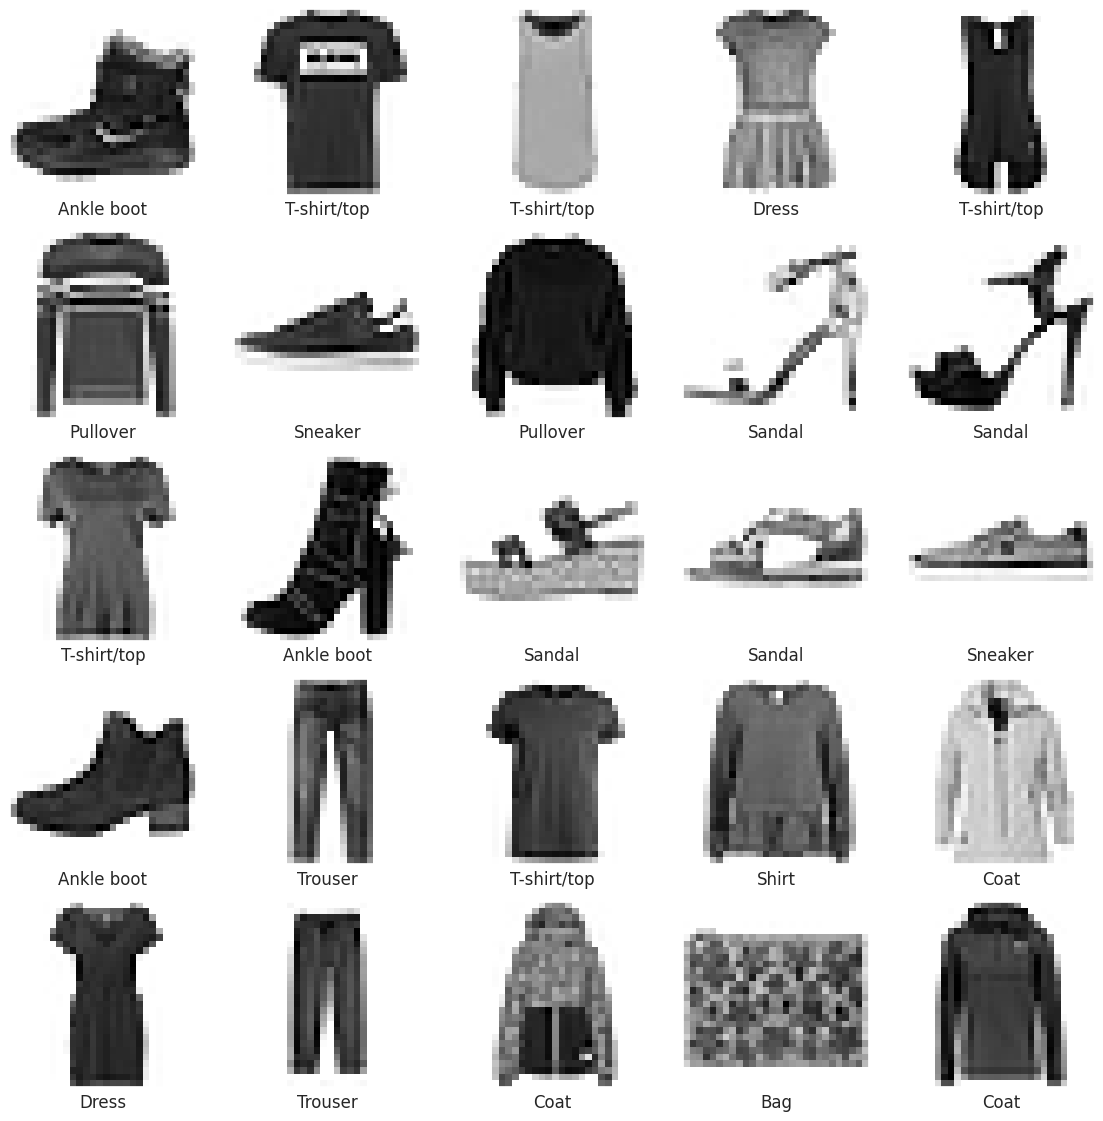

In [11]:
plt.figure(figsize=(14,14))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(label_name[train_labels[i]])
plt.show()

# Building Deep MultiLayer Perceptron Model

In [15]:
model = Sequential()
model.add(Flatten(input_shape=(28,28))) # convert 2d to 1d
# first hidden layer
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
# 2nd hidden layer
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
# output
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization_6 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_7 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 10)               

In [16]:
784*128+128

100480

In [17]:
128*128+128

16512

In [21]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=64)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 [==============================] - 8s 5ms/step - loss: 0.4648 - accuracy: 0.8343 - val_loss: 0.4380 - val_accuracy: 0.8432
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3640 - accuracy: 0.8674 - val_loss: 0.4016 - val_accuracy: 0.8578
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3266 - accuracy: 0.8813 - val_loss: 0.3792 - val_accuracy: 0.8618
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3079 - accuracy: 0.8885 - val_loss: 0.3589 - val_accuracy: 0.8696
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2907 - accuracy: 0.8921 - val_loss: 0.3524 - val_accuracy: 0.8706
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2802 - accuracy: 0.8954 - val_loss: 0.3563 - val_accuracy: 0.8764
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2703 - accuracy: 0.8994 - val_loss: 0.3706 - val_accuracy: 0.8678
Epoch 8/10
938/93